In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
%matplotlib inline

TensorFlow 1.x selected.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.1 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
--2022-06-23 10:02:09--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3036::ac43:b421, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  3.55MB/s    in 0.3s    

2022-06-23 10:02:10 (3.55 MB/s) - ‘Mask_RCNN_basic_1.zip’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
   creating: Mask_RCNN/
  inflating: Mask_RCNN/.gitignore    
   creating: Mask_RCNN/assets/
   cr

Using TensorFlow backend.


... done downloading pretrained model!


In [ ]:
import cv2

In [ ]:
img = cv2.imread("/content/pic/t_ (29).jpg")

test_model, inference_config = load_inference_model(1, "/content/model_acne.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r = test_model.detect([image])[0]

Loading weights from  /content/model_acne.h5


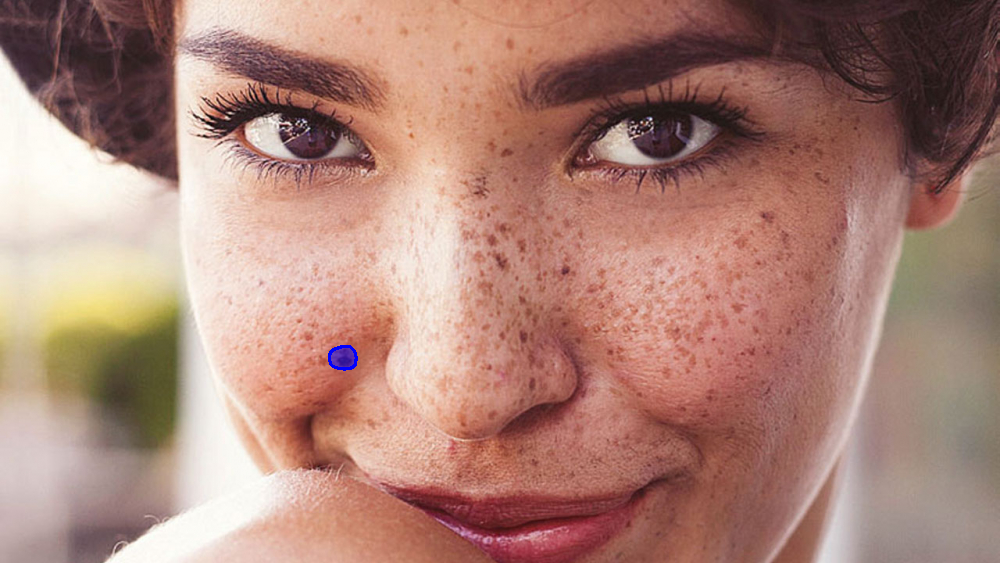

1


In [ ]:
from mrcnn.visualize import random_colors, get_mask_contours, draw_mask
from google.colab.patches import cv2_imshow

object_count = len(r["class_ids"])
colors = random_colors(object_count)
count = 0
for i in range(object_count):
  mask = r["masks"][:, :, i]
  contours = get_mask_contours(mask)
  for cnt in contours:
    #cv2.rectangle(img, [cnt], True, colors[i], 2)
    cv2.polylines(img, [cnt], True, colors[i], 2)
    img = draw_mask(img, [cnt], colors[i])
    count =+ 1
  
cv2_imshow(img)
print(count)